In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [20]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('Projects/fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [11]:
df = df.loc[(df['value'] <= df['value'].quantile(0.975)) & (df['value'] >= df['value'].quantile(0.025))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


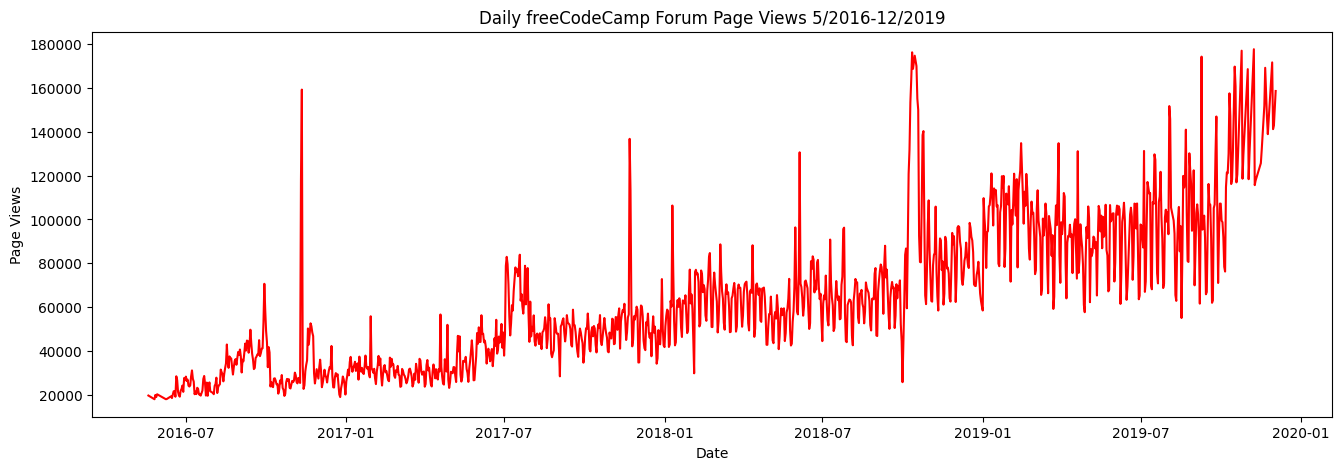

In [12]:
fig, ax = plt.subplots(figsize=(16,5))
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.plot(df, color='red')

In [13]:
df_bar = df.copy()
df_bar = df_bar.reset_index()
df_bar['date'] = pd.to_datetime(df_bar['date'])
df_bar['years'] = df_bar['date'].dt.year
df_bar['Months'] = df_bar['date'].dt.month
months_named = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
                6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October',
                11: 'November', 12: 'December'}
order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df_bar['Months'] = pd.Categorical(df_bar['Months'].map(months_named), categories=order, ordered=True)
df_bar = df_bar.groupby(['years', 'Months'])['value'].mean()
df_bar = df_bar.unstack()
df_bar



Months,January,February,March,April,May,June,July,August,September,October,November,December
years,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


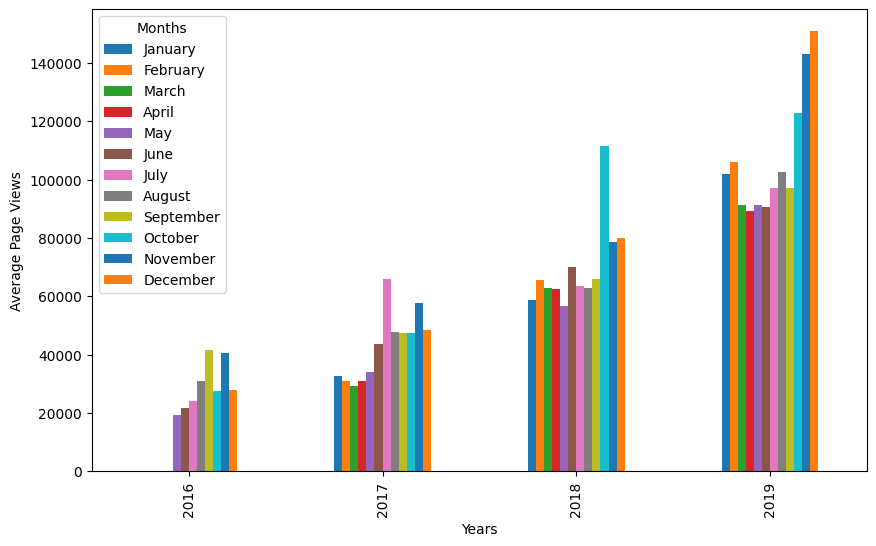

In [18]:
fig = df_bar.plot(kind='bar', figsize=(10,6))
plt.xlabel('Years')
plt.ylabel('Average Page Views')
fig = fig.figure

In [15]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


In [16]:
df_box = df_box.rename(columns={'value': 'Page Views', 'year': 'Year', 'month': 'Month'})
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_box['Month'] = pd.Categorical(df_box['Month'], categories=order, ordered=True)
df_box

,date,Page Views,Year,Month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


<Axes: title={'center': 'Month-wise Box Plot (Seasonality)'}, xlabel='Month', ylabel='Page Views'>

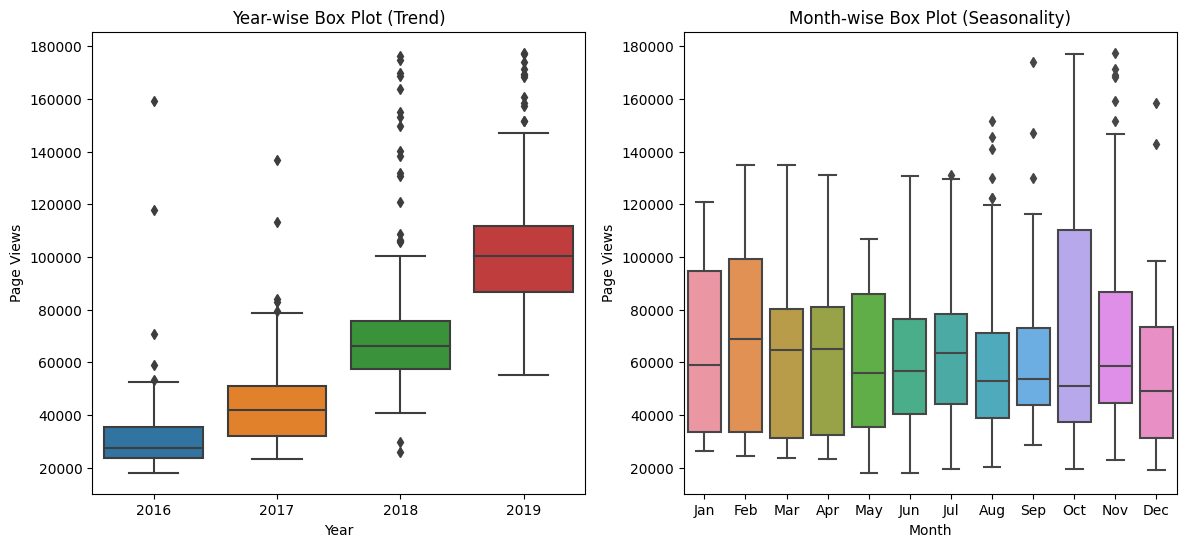

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].set_title('Year-wise Box Plot (Trend)')
axs[1].set_title('Month-wise Box Plot (Seasonality)')
sns.boxplot(data=df_box, x='Year', y='Page Views', ax=axs[0])
sns.boxplot(data=df_box, x='Month', y='Page Views', ax=axs[1])